## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [ ]:
import pandas as pd

# Načítanie datasetu
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
data_hf = pd.read_csv(url)

# Skontrolujeme chýbajúce hodnoty
print(data_hf.isna().sum())


   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

Nie, podľa výpisu vidím, že dataset neobsauje chýbajúce hodnoty

**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

In [ ]:
# Skontrolujeme dátové typy pre vybrané premenné
# Pomocou .dtypes zistíme typ dát pre každý stĺpec. Numerické premenné budú mať typ 'int64' alebo 'float64',
# Kategorické môžu byť 'int64' (ak sú binárne) alebo 'object' (ak sú textové).
print("Dátové typy pre vybrané premenné:")
print(data_hf[['age', 'anaemia', 'high_blood_pressure', 'serum_sodium', 'DEATH_EVENT']].dtypes)

# Skontrolujeme základné štatistiky pre 'age'
# Pomocou .describe získame štatistické údaje o numerickej premenej 'age'. 
print("\nŠtatistiky pre 'age':")
print(data_hf['age'].describe())

# Skontrolujeme základné štatistiky pre 'anaemia'
# Pre 'anaemia' overujeme, či je premenná binárna (0 alebo 1). Ak má len 2 unikátne hodnoty, bude to indikovať kategorickú (binárnu) premennú.
print("\nŠtatistiky pre 'anaemia':")
print(data_hf['anaemia'].describe())

# Skontrolujeme základné štatistiky pre 'high_blood_pressure'
# Podobne ako pri 'anaemia', chceme zistiť, či ide o binárnu premennú, ktorá označuje prítomnosť alebo neprítomnosť vysokého krvného tlaku.
print("\nŠtatistiky pre 'high_blood_pressure':")
print(data_hf['high_blood_pressure'].describe())

# Skontrolujeme základné štatistiky pre 'serum_sodium'
# 'serum_sodium' bude pravdepodobne numerická premenná, ale chceme overiť, či má kontinuálny charakter (hodnoty môžu byť desatinné).
print("\nŠtatistiky pre 'serum_sodium':")
print(data_hf['serum_sodium'].describe())

# Skontrolujeme základné štatistiky pre 'DEATH_EVENT'
# 'DEATH_EVENT' bude binárna premenná, ktorá obsahuje hodnoty 0 a 1, kde 0 znamená, že pacient prežil, a 1, že zomrel.
print("\nŠtatistiky pre 'DEATH_EVENT':")
print(data_hf['DEATH_EVENT'].describe())




Dátové typy pre vybrané premenné:
age                    float64
anaemia                  int64
high_blood_pressure      int64
serum_sodium             int64
DEATH_EVENT              int64
dtype: object

Štatistiky pre 'age':
count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

Štatistiky pre 'anaemia':
count    299.000000
mean       0.431438
std        0.496107
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: anaemia, dtype: float64

Štatistiky pre 'high_blood_pressure':
count    299.000000
mean       0.351171
std        0.478136
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: high_blood_pressure, dtype: float64

Štatistiky pre 'serum_sodium':
count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.00000

**Obsahuje dataset duplicitné záznamy?**

In [ ]:
# Skontrolujeme, či sú v datasete duplicitné záznamy
duplicates = data_hf.duplicated().sum()

# Vypíšeme počet duplicitných záznamov
print(f"Počet duplicitných záznamov: {duplicates}")

# Keďže vypísalo 0, nepredpokladáme výskyt duplicitných záznamov

Počet duplicitných záznamov: 0


### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

In [9]:
# Počet mužov a žien v datasete
print("Počet mužov a žien v datasete:")
print(data_hf['sex'].value_counts())

# Počet nefajčiarov medzi mužmi a ženami (sex = 0 pre ženy, sex = 1 pre mužov)
print("\nPočet nefajčiarov medzi mužmi a ženami:")
nefajciari_zeny = data_hf[(data_hf['sex'] == 0) & (data_hf['smoking'] == 0)].shape[0]
nefajciari_muzi = data_hf[(data_hf['sex'] == 1) & (data_hf['smoking'] == 0)].shape[0]

print(f"Nefajčiari ženy: {nefajciari_zeny}")
print(f"Nefajčiari muži: {nefajciari_muzi}")


Počet mužov a žien v datasete:
sex
1    194
0    105
Name: count, dtype: int64

Počet nefajčiarov medzi mužmi a ženami:
Nefajčiari ženy: 101
Nefajčiari muži: 102


**Koľko záznamov mužov a žien obsahuje dataset?**

Záznam obsahuje 194 mužov a 105 žien

**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

Záznam obsahuje 101 žien - nefajčiariek a 102 mužov - nefajčiarov

### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [10]:
# Získame základné štatistiky pre vek ('age')
print("Základné štatistiky pre vek:")
print(data_hf['age'].describe())

# Zistíme, ktorý vek sa v datasete vyskytuje najčastejšie
print("\nVek s najviac záznamami:")
most_common_age = data_hf['age'].mode()[0]  # mode() vracia najčastejší vek, [0] nám dá prvý (a jediný) najčastejší vek
print(f"Najčastejší vek: {most_common_age}")


Základné štatistiky pre vek:
count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

Vek s najviac záznamami:
Najčastejší vek: 60.0


**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

Minimálny vek je 40 rokov
Maximály vek je 95 rokov
Priemerný vek je zhruba 61 rokov

**Z akého veku je v datasete najviac záznamov?**

Z veku 60 je v datasete najviac záznamov

### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

In [12]:
import matplotlib.pyplot as plt

# Pridáme premennú 'risk' do datasetu
data_hf['risk'] = data_hf.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

# Vizualizujeme distribúciu veku pre pacientov s vysokým rizikom
high_risk = data_hf[data_hf['risk'] == 'High']

# Zistenie veku, v ktorom je riziko zlyhania srdca najväčšie
most_common_age_high_risk = high_risk['age'].mode()[0]
print(f"Vek, v ktorom je riziko zlyhania srdca najväčšie: {most_common_age_high_risk}")

# Počet záznamov v tejto vekovej kategórii (približne)
age_group_count = high_risk[high_risk['age'] == most_common_age_high_risk].shape[0]
print(f"Počet záznamov v tejto vekovej kategórii: {age_group_count}")


Vek, v ktorom je riziko zlyhania srdca najväčšie: 60.0
Počet záznamov v tejto vekovej kategórii: 18


Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

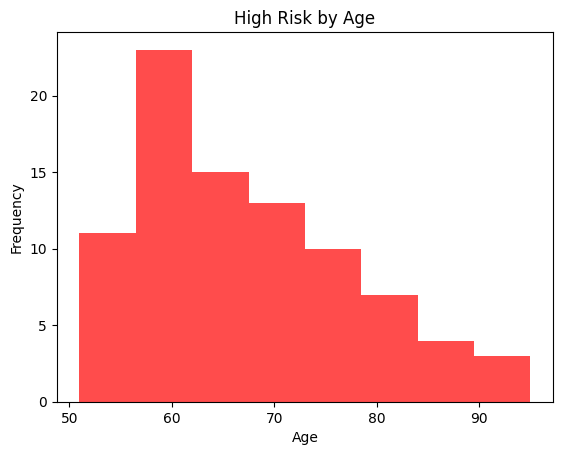

In [13]:
# Histogram pre vek pacientov s vysokým rizikom
plt.hist(high_risk['age'], bins='auto', color='red', alpha=0.7)
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**V akom veku je riziko zlyhania srdca najväčšie?**

Riziko zlyhania srdca je najväčšie vo veku 60 rokov

**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

Počet záznamov v tejto vekovej kategórii je 18

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


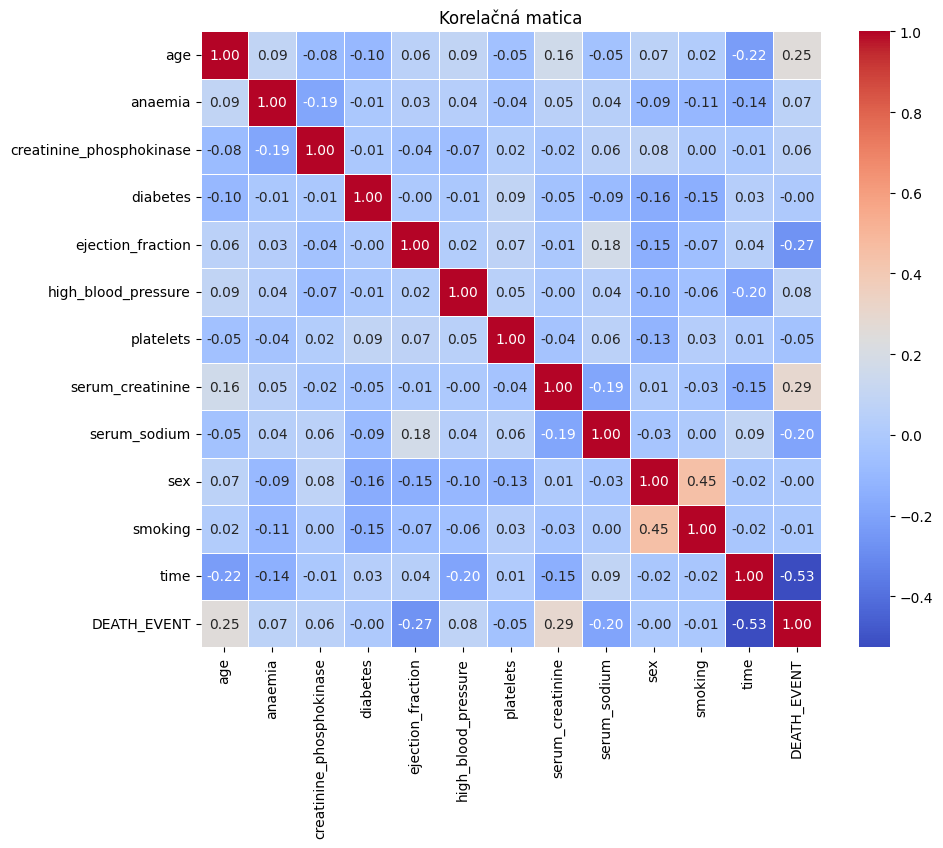

Dvojice s najväčšou zápornou koreláciou:
time         DEATH_EVENT   -0.526964
DEATH_EVENT  time          -0.526964
dtype: float64

Dvojice s najväčšou kladnou koreláciou:
age  age    1.0
dtype: float64


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Odstránime nenumerické atribúty (napríklad 'sex', 'anaemia' atď.)
numerical_data = data_hf.select_dtypes(include=['float64', 'int64'])

# Vytvoríme korelačnú maticu
correlation_matrix = numerical_data.corr()

# Vizualizácia korelačnej matice pomocou heatmapy
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelačná matica')
plt.show()

# Získame dvojice atribútov s najväčšou zápornou koreláciou
negative_corr = correlation_matrix[correlation_matrix < -0.5].stack().sort_values(ascending=True)
print("Dvojice s najväčšou zápornou koreláciou:")
print(negative_corr.head(2))  # Prvé dve dvojice záporných korelácií

# Získame dvojice atribútov s najväčšou kladnou koreláciou
positive_corr = correlation_matrix[correlation_matrix > 0.5].stack().sort_values(ascending=False)
print("\nDvojice s najväčšou kladnou koreláciou:")
print(positive_corr.head(1))  # Prvá dvojica kladných korelácií


**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

Najväčšiu zápornú koreláciu majú medzi sebou atribúty time a DEATH_EVENT

**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

Najväčšiu kladnú koreláciu majú medzi sebou atribúty age a age

----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure